## 线性回归问题


### 先观察原始数据

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 中文乱码的处理
plt.rcParams['font.sans-serif'] =['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

,Population,Profit
0,30,35000
1,45,37000
2,60,44000
3,75,54000
4,90,55000


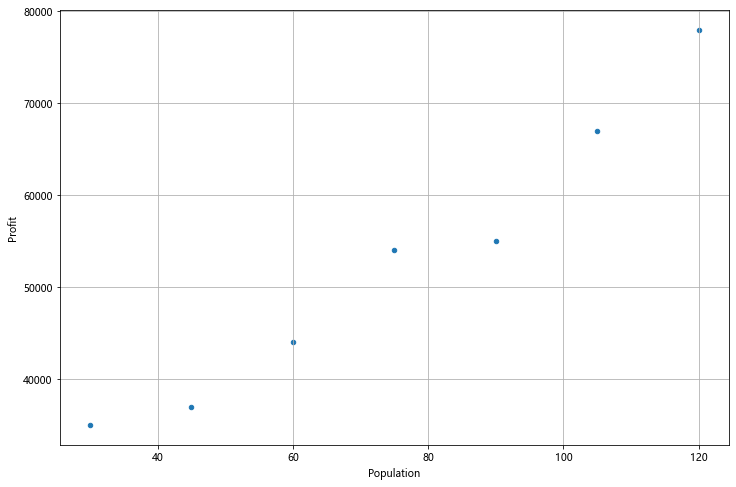

In [267]:
#随便创建一些列合适的点
data = pd.DataFrame({'Population':np.arange(2,9)*15,'Profit':np.array([35,37,44,54,55,67,78])*1000})
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.grid()# 添加格子
data.head()

### 根据原始数据线性模拟
已知公式
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>J</mi>
  <mrow>
    <mo>(</mo>
    <mi>&#x03B8;<!-- θ --></mi>
    <mo>)</mo>
  </mrow>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mrow>
      <mn>2</mn>
      <mi>m</mi>
    </mrow>
  </mfrac>
  <munderover>
    <mo movablelimits="false">&#x2211;<!-- ∑ --></mo>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>m</mi>
    </mrow>
  </munderover>
  <mrow class="MJX-TeXAtom-ORD">
    <mrow class="MJX-TeXAtom-ORD">
      <msup>
        <mrow class="MJX-TeXAtom-ORD">
          <mrow>
            <mo>(</mo>
            <mrow class="MJX-TeXAtom-ORD">
              <msub>
                <mrow class="MJX-TeXAtom-ORD">
                  <mi>h</mi>
                </mrow>
                <mrow class="MJX-TeXAtom-ORD">
                  <mi>&#x03B8;<!-- θ --></mi>
                </mrow>
              </msub>
            </mrow>
            <mrow>
              <mo>(</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <msup>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mi>x</mi>
                  </mrow>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mo stretchy="false">(</mo>
                    <mi>i</mi>
                    <mo stretchy="false">)</mo>
                  </mrow>
                </msup>
              </mrow>
              <mo>)</mo>
            </mrow>
            <mo>&#x2212;<!-- − --></mo>
            <mrow class="MJX-TeXAtom-ORD">
              <msup>
                <mrow class="MJX-TeXAtom-ORD">
                  <mi>y</mi>
                </mrow>
                <mrow class="MJX-TeXAtom-ORD">
                  <mo stretchy="false">(</mo>
                  <mi>i</mi>
                  <mo stretchy="false">)</mo>
                </mrow>
              </msup>
            </mrow>
            <mo>)</mo>
          </mrow>
        </mrow>
        <mrow class="MJX-TeXAtom-ORD">
          <mn>2</mn>
        </mrow>
      </msup>
    </mrow>
  </mrow>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow class="MJX-TeXAtom-ORD">
    <msub>
      <mrow class="MJX-TeXAtom-ORD">
        <mi>h</mi>
      </mrow>
      <mrow class="MJX-TeXAtom-ORD">
        <mi>&#x03B8;<!-- θ --></mi>
      </mrow>
    </msub>
  </mrow>
  <mrow>
    <mo>(</mo>
    <mi>x</mi>
    <mo>)</mo>
  </mrow>
  <mo>=</mo>
  <mrow class="MJX-TeXAtom-ORD">
    <msup>
      <mrow class="MJX-TeXAtom-ORD">
        <mi>&#x03B8;<!-- θ --></mi>
      </mrow>
      <mrow class="MJX-TeXAtom-ORD">
        <mi>T</mi>
      </mrow>
    </msup>
  </mrow>
  <mi>X</mi>
  <mo>=</mo>
  <mrow class="MJX-TeXAtom-ORD">
    <msub>
      <mrow class="MJX-TeXAtom-ORD">
        <mi>&#x03B8;<!-- θ --></mi>
      </mrow>
      <mrow class="MJX-TeXAtom-ORD">
        <mn>0</mn>
      </mrow>
    </msub>
  </mrow>
  <mo>+</mo>
  <mrow class="MJX-TeXAtom-ORD">
    <msub>
      <mrow class="MJX-TeXAtom-ORD">
        <mi>&#x03B8;<!-- θ --></mi>
      </mrow>
      <mrow class="MJX-TeXAtom-ORD">
        <mn>1</mn>
      </mrow>
    </msub>
  </mrow>
  <mrow class="MJX-TeXAtom-ORD">
    <msub>
      <mrow class="MJX-TeXAtom-ORD">
        <mi>x</mi>
      </mrow>
      <mrow class="MJX-TeXAtom-ORD">
        <mn>1</mn>
      </mrow>
    </msub>
  </mrow>
  <mspace linebreak="newline" />
</math>

使用批量梯度下降算法：
![tdxj](../img/tdxj.jpg)

In [195]:
#这个部分计算J(Ѳ)，X是矩阵 thet矩阵
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

首先初始化整理数据

1. 初始化theat=[0,0]

2. 设置x y 矩阵

3. 批量梯段算法更新theat，直到某个合适的点或者次数

5. 讲得到的theat可视化展示

6. 预测

In [269]:
x=data.iloc[:,:-1]
x.insert(0,'ones',1)# 目的是为了和theat相乘时，保留theat0的值
y=data.iloc[:,-1]
print(x.head())
print(y.head())

ones  Population
0     1          30
1     1          45
2     1          60
3     1          75
4     1          90
0    35000
1    37000
2    44000
3    54000
4    55000
Name: Profit, dtype: int32


In [270]:
# 数组转为矩阵
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))# 初始化theat
x.shape, theta.shape, y.shape

((7, 2), (1, 2), (1, 7))

In [271]:
# 尝试计算下j(theat),当我们设置初始值theta0和theta1 都为0 时，会发现数据很多
computeCost(x,y,theta)

10522000000.0

### 接下来使用梯度下降算法逐渐取得合适的theta


In [199]:
# J(theta)的变量是theta，而不是X和y，意思是说，我们变化的值来使J(theta)变化，而不是变化X和y的值。 
def gradientDescent(x,y,theta,alpha,number):
    #alpha学习速率 要执行的迭代次数number
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])# theat个数
    cost = np.zeros(number)# 记录cost每次循环cost数
    for i in range(number):
        dis = (x * theta.T) - y
        for j in range(parameters):
            term= np.multiply(dis,x[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        # print(theta)
        cost[i] = computeCost(x,y,theta)
    return theta,cost

In [272]:
# 测试
r,cost1 = gradientDescent(x,y,theta,0.00001,10000)
print(r)
# print(cost1[-1])

[[185.25492599 605.43679576]]


### 做图验证


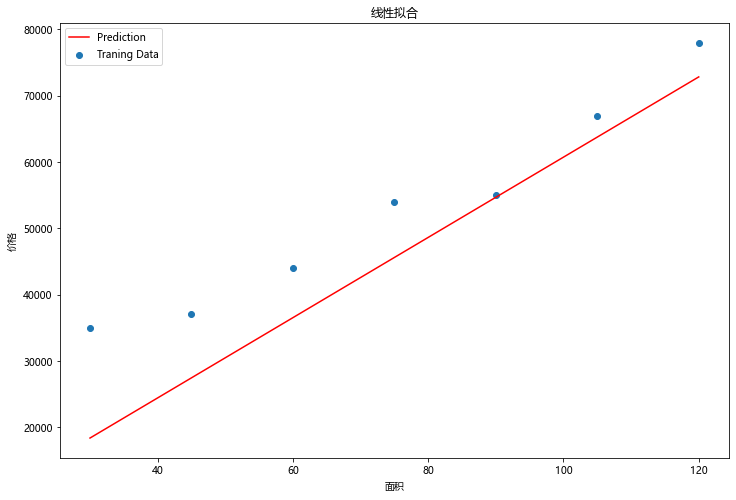

In [273]:
x1 = np.linspace(data.Population.min(), data.Population.max(), 100)
f = r[0, 0] + (r[0, 1] * x1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x1, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('面积')
ax.set_ylabel('价格')
ax.set_title('线性拟合')
plt.show()
#原始数据以及拟合的直线

可以看到我们通过一万次的计算，基本已经很接近，
* 注意alpha 和 theta的初始取值不通导致结果差异很大，所以这种方式并不很好

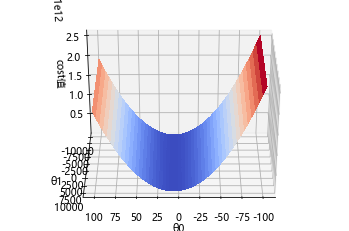

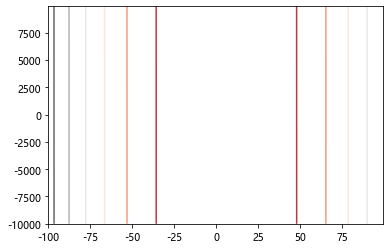

In [274]:
# 直接作图j(θ)的三维图和热力图 [[ 18.76201787 673.02331606]]
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# 讲我们计算的θ [242.43085677 670.45235553]带入到，前面的j（θ）函数 
theat0= np.arange(-100,100,1)
theat1= np.arange(-10000,10000,100)
def surface(x,y,theat0,theat1):
    Z=np.zeros((len(theat0),len(theat1)))
    for i,t0 in enumerate(theat0):
        for j ,t1 in enumerate(theat1):
            Z[i,j] = computeCost(x,y,np.matrix((t0,t1)))
    X, Y = np.meshgrid(theat0, theat1)
    fig1 = plt.figure(1)
    ax = fig1.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)
    ax.set_xlabel('θ0')
    ax.set_ylabel('θ1')
    ax.set_zlabel('cost值');
    # 60度的仰角（即，x-y平面上方60度）和35度的方位角（即，围绕z轴逆时针旋转35度）：
    ax.view_init(30, 90)
    # 密度图
    fig1 = plt.figure(2)
    plt.contour(X, Y, Z, cmap='RdGy');
surface(x,y,theat0,theat1)


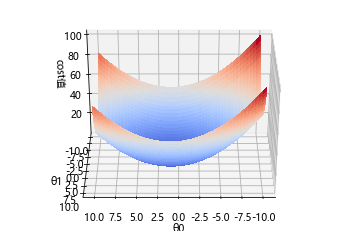

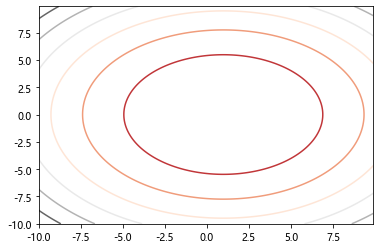

In [212]:
# # 特征归一化
# 观察数据发现，Population变量是Profit的的1000倍大小,统一量级会让梯度下降收敛的更快。做法就是，将每类特征减去他的平均值后除以标准差
data2 = (data-data.mean())/data.std()
data2.head()
# 重新计算并绘制图像
x=data2.iloc[:,:-1]
x.insert(0,'ones',1)# 目的是为了和theat相乘时，保留theat0的值
y=data2.iloc[:,-1]
x = np.matrix(x.values)
y = np.matrix(y.values).T
theat0= np.arange(-10,10,0.1)
theat1= np.arange(-10,10,0.1)
surface(x,y,theat0,theat1)

In [255]:
# 多变量线性回归（假设 我们有'Size', 'Bedrooms', 'Price' 其中size和bedrooms作为两个特征值）
data3= pd.DataFrame({'Size':[2104,1600,2400,1416,3000],'Bedrooms':[3,3,3,2,4],'Price':[399900,329900,369000,232000,539900]})
# 特征值归一化
data3 = data3 - data3.mean()
data3['Size'] = data3['Size']/1000
data3['Price'] = data3['Price']/100000
# 取得 对应x 和y
data3.insert(0,'ones',1)
print(data3.head())
cols = data3.shape[1]
x = data3.iloc[:,0:cols-1]
y = data3.iloc[:,cols-1:cols]
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))# 初始化theat
r,t=gradientDescent(x,y,theta,0.01,2000)
print(r)

ones   Size  Bedrooms   Price
0     1  0.000       0.0  0.2576
1     1 -0.504       0.0 -0.4424
2     1  0.296       0.0 -0.0514
3     1 -0.688      -1.0 -1.4214
4     1  0.896       1.0  1.6576
[[-5.73985304e-18  2.25921587e-01  2.61397151e-01]]


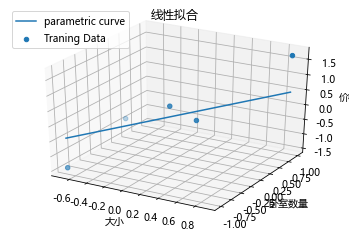

In [263]:
# 画图验证
# 因为是涉及到两个变量，所以θ0是常数就先不管，则画出 z=θ0+θ1x+θ2y  讲x y 为特征值 Size Bedrooms
size = np.linspace(data3.Size.min(), data3.Size.max(), 10)
bed = np.linspace(data3.Bedrooms.min(), data3.Bedrooms.max(), 10)
f = r[0, 0] + (r[0, 1] * size) +(r[0,2] * bed)
def plot_fig(f):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # fig, ax = plt.subplots(figsize=(12,8))
    # ax.scatter(data.Population, data.Profit, label='Traning Data')
    ax.scatter(data3.Size, data3.Bedrooms, data3.Price,label='Traning Data')
    ax.plot(size, bed, f ,label='parametric curve')
    ax.legend(loc=2)
    ax.set_xlabel('大小')
    ax.set_ylabel('卧室数量')
    ax.set_zlabel('价格')
    ax.set_title('线性拟合')
    plt.show()
plot_fig(f)

## 正规方程


正规方程是通过求解下面的方程来找出使得代价函数最小的参数的，$\frac{\partial}{\partial{\theta_{j}}}J\left( {\theta_{j}} \right)=0$ 。 假设我们的训练集特征矩阵为 $X$（包含了 ${{x}_{0}}=1$）并且我们的训练集结果为向量 $y$，则利用正规方程解出向量 $\theta ={{\left( {X^T}X \right)}^{-1}}{X^{T}}y$ 。 上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={X^{T}}X$，则：${{\left( {X^T}X \right)}^{-1}}={A^{-1}}$ ：

In [265]:
## 这里 我们直接用正规方程来求解，然年作图
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X) 向量点积
    return theta
theta =normalEqn(x,y)
print(theta)

[[0.        ]
 [0.63953488]
 [1.03298837]]


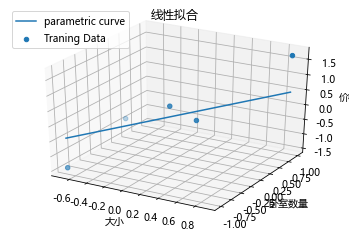

In [266]:
f = theta[0,0] + (r[0, 1] * size) +(r[0,2] * bed)
plot_fig(f)

增加内容：

$\theta ={{\left( {X^{T}}X \right)}^{-1}}{X^{T}}y$ 的推导过程：

$J\left( \theta \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {h_{\theta}}\left( {x^{(i)}} \right)-{y^{(i)}} \right)}^{2}}}$ 其中：${h_{\theta}}\left( x \right)={\theta^{T}}X={\theta_{0}}{x_{0}}+{\theta_{1}}{x_{1}}+{\theta_{2}}{x_{2}}+...+{\theta_{n}}{x_{n}}$

将向量表达形式转为矩阵表达形式，则有$J(\theta )=\frac{1}{2}{{\left( X\theta -y\right)}^{2}}$ ，其中$X$为$m$行$n$列的矩阵（$m$为样本个数，$n$为特征个数），$\theta$为$n$行1列的矩阵，$y$为$m$行1列的矩阵，对$J(\theta )$进行如下变换

$J(\theta )=\frac{1}{2}{{\left( X\theta -y\right)}^{T}}\left( X\theta -y \right)$

​ $=\frac{1}{2}\left( {{\theta }^{T}}{{X}^{T}}-{{y}^{T}} \right)\left(X\theta -y \right)$

​ $=\frac{1}{2}\left( {{\theta }^{T}}{{X}^{T}}X\theta -{{\theta}^{T}}{{X}^{T}}y-{{y}^{T}}X\theta -{{y}^{T}}y \right)$

接下来对$J(\theta )$偏导，需要用到以下几个矩阵的求导法则(矩阵对Y=F(X)求导相当于对矩阵每个元素求导): 

$\frac{d{x}^{T}}{dx}={I}$

$\frac{dAB}{dB}={{A}^{T}}$

$\frac{d{{X}^{T}}AX}{dX}=2AX$

所以有:

$\frac{\partial J\left( \theta \right)}{\partial \theta }=\frac{1}{2}\left(2{{X}^{T}}X\theta -{{X}^{T}}y -{}({{y}^{T}}X )^{T}-0 \right)$

$=\frac{1}{2}\left(2{{X}^{T}}X\theta -{{X}^{T}}y -{{X}^{T}}y -0 \right)$

​ $={{X}^{T}}X\theta -{{X}^{T}}y$

令$\frac{\partial J\left( \theta \right)}{\partial \theta }=0$,

则有$\theta ={{\left( {X^{T}}X \right)}^{-1}}{X^{T}}y$